## [Mincost Climbing Stairs](https://leetcode.com/problems/min-cost-climbing-stairs/description/)

On a staircase, the i-th step has some non-negative cost cost[i] assigned (0 indexed).

Once you pay the cost, you can either climb one or two steps. You need to find minimum cost to reach the top of the floor, and you can either start from the step with index 0, or the step with index 1.

Example 1:
```
Input: cost = [10, 15, 20]
Output: 15
Explanation: Cheapest is start on cost[1], pay that cost and go to the top.
```
Example 2:
```
Input: cost = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
Output: 6
Explanation: Cheapest is start on cost[0], and only step on 1s, skipping cost[3].
```
Note:
```
cost will have a length in the range [2, 1000].
Every cost[i] will be an integer in the range [0, 999].
```


In [3]:
class Solution(object):
    def minCostClimbingStairs(self, costs):
        """
        :type costs: List[int]
        :rtype: int
        """
        
        # DP version, optimized for space
        
        if not costs:
            return 0
        
        if len(costs) == 1:
            return costs[1]
        
        if len(costs) == 2:
            return min(costs[0], costs[1])
        
        # fixed costs for the top two steps
        # Solution to this problem relies on two variables
        #   cost of starting from cur step or next step
        # so we can avoid the array of N and use just two
        # variables to track the cost. That brings down the
        # space cost from O(N) to O(1). Time still remains 
        # at O(N) though.
        
        c1 = costs[-1]
        c2 = costs[-2]
        
        # start from third step from the top
        for step in range(len(costs)-3, -1, -1):
            c2, c1 = costs[step] + min(c1, c2), c2
            
        # now the fight is between the first and second step
        return min(c1, c2)
    
    def minCostClimbingStairsDP(self, costs):
        """
        :type costs: List[int]
        :rtype: int
        """
        
        # recursion works, but times out to super high cost of 2^n
        # trying to optimize that with DP
        # 
        
        if not costs:
            return 0
        
        if len(costs) == 1:
            return costs[1]
        
        if len(costs) == 2:
            return min(costs[0], costs[1])
        
        # start from the top
        topCosts = [0] * len(costs)
        
        # fixed costs for the top two steps
        topCosts[-1] = costs[-1]
        topCosts[-2] = costs[-2]
        
        # start from third step from the top
        for step in range(len(costs)-3, -1, -1):
            # mincost at step i will be cost of that step
            # + mincost from next step or next+1 step as
            # we are allowed to jump one or two steps to
            # reach the top
            topCosts[step] = costs[step] + min(topCosts[step+1], topCosts[step+2])
        
        # now the fight is between the first and second step
        return min(topCosts[0], topCosts[1])
        
    def minCostClimbingStairsRec(self, cost):
        """
        :type cost: List[int]
        :rtype: int
        """
        # each step, we can go one step ahead or two step ahead
        #   thats two possibilities at each step
        # minCost
        # at each step
        #   cost of taking one step
        #   cost of taking two steps
        #
        # costs, costToReachTop, step
        
        def stepUp(costs, costToReachTop, step, minCost):
            if step >= len(cost):
                # reached the top
                minCost[0] = min(minCost[0], costToReachTop)
            else:
                stepUp(costs, costToReachTop+cost[step], step+1, minCost)
                stepUp(costs, costToReachTop+cost[step], step+2, minCost)

        
        minCost = [float('inf')]
        stepUp(cost, 0, 0, minCost)
        stepUp(cost, 0, 1, minCost)
        
        return minCost[0]

In [8]:
testCases = [
    ([10, 15, 20], 15),
    ([1, 100, 1, 1, 1, 100, 1, 1, 100, 1], 6),
    ([841,462,566,398,243,248], 1103),
    ([841,462,565,569,275,259,872,630], 1920),
    ([10, 4], 4)
]

specialCase = (
    [841,462,566,398,243,248,238,650,989,576,361,126,334,729,446,897,953,38,195,679,65,707,196,705,569,275,259,872,630,965,978,109,56,523,851,887,91,544,598,963,305,481,959,560,454,883,50,216,732,572,511,156,177,831,122,667,548,978,771,880,922,777,990,498,525,317,469,151,874,202,519,139,670,341,514,469,858,913,94,849,839,813,664,163,3,802,21,634,944,901,446,186,843,742,330,610,932,614,625,169,833,4,81,55,124,294,71,24,929,534,621,543,417,534,427,327,179,90,341,949,368,692,646,290,488,145,273,617,596,82,538,751,80,616,763,826,932,184,630,478,163,925,259,237,839,602,60,786,603,413,816,278,4,35,243,64,631,405,23,638,618,829,481,877,756,482,999,973,718,157,262,752,931,882,741,40,77,535,542,879,607,879,321,46,210,116,244,830,591,285,382,925,48,497,913,203,239,696,162,623,291,525,950,27,546,293,108,577,672,354,256,3,671,998,22,989,557,424,251,923,542,243,46,488,80,374,372,334,190,817,150,742,362,196,75,193,162,645,859,758,433,903,199,289,175,303,475,818,213,576,181,668,243,297,572,549,840,161,292,719,226,338,981,345,203,655,210,65,111,746,76,935,406,646,976,567,32,726,638,674,727,861,426,297,349,464,973,341,452,826,223,805,940,458,468,967,107,345,987,553,407,916,103,324,367,864,74,946,712,596,105,194,79,634,855,703,70,170,543,208,739,632,663,880,857,824,258,743,488,659,647,470,958,492,211,927,356,488,744,570,143,674,502,589,270,80,6,463,506,556,495,713,407,229,689,280,162,454,757,565,267,575,417,948,607,269,852,938,560,24,222,580,604,800,628,487,485,615,796,384,555,226,412,445,503,810,949,966,28,768,83,213,883,963,831,390,951,378,497,440,780,209,734,290,96,398,146,56,445,880,910,858,671,164,552,686,748,738,837,556,710,787,343,137,298,685,909,828,499,816,538,604,652,7,272,729,529,343,443,593,992,434,588,936,261,873,64,177,827,172,712,628,609,328,672,376,628,441,9,92,525,222,654,699,134,506,934,178,270,770,994,158,653,199,833,802,553,399,366,818,523,447,420,957,669,267,118,535,971,180,469,768,184,321,712,167,867,12,660,283,813,498,192,740,696,421,504,795,894,724,562,234,110,88,100,408,104,864,473,59,474,922,759,720,69,490,540,962,461,324,453,91,173,870,470,292,394,771,161,777,287,560,532,339,301,90,411,387,59,67,828,775,882,677,9,393,128,910,630,396,77,321,642,568,817,222,902,680,596,359,639,189,436,648,825,46,699,967,202,954,680,251,455,420,599,20,894,224,47,266,644,943,808,653,563,351,709,116,849,38,870,852,333,829,306,881,203,660,266,540,510,748,840,821,199,250,253,279,672,472,707,921,582,713,900,137,70,912,51,250,188,967,14,608,30,541,424,813,343,297,346,27,774,549,931,141,81,120,342,288,332,967,768,178,230,378,800,408,272,596,560,942,612,910,743,461,425,878,254,929,780,641,657,279,160,184,585,651,204,353,454,536,185,550,428,125,889,436,906,99,942,355,666,746,964,936,661,515,978,492,836,468,867,422,879,92,438,802,276,805,832,649,572,638,43,971,974,804,66,100,792,878,469,585,254,630,309,172,361,906,628,219,534,617,95,190,541,93,477,933,328,984,117,678,746,296,232,240,532,643,901,982,342,918,884,62,68,835,173,493,252,382,862,672,803,803,873,24,431,580,257,457,519,388,218,970,691,287,486,274,942,184,817,405,575,369,591,713,158,264,826,870,561,450,419,606,925,710,758,151,533,405,946,285,86,346,685,153,834,625,745,925,281,805,99,891,122,102,874,491,64,277,277,840,657,443,492,880,925,65,880,393,504,736,340,64,330,318,703,949,950,887,956,39,595,764,176,371,215,601,435,249,86,761,793,201,54,189,451,179,849,760,689,539,453,450,404,852,709,313,529,666,545,399,808,290,848,129,352,846,2,266,777,286,22,898,81,299,786,949,435,434,695,298,402,532,177,399,458,528,672,882,90,547,690,935,424,516,390,346,702,781,644,794,420,116,24,919,467,543,58,938,217,502,169,457,723,122,158,188,109,868,311,708,8,893,853,376,359,223,654,895,877,709,940,195,323,64,51,807,510,170,508,155,724,784,603,67,316,217,148,972,19,658,5,762,618,744,534,956,703,434,302,541,997,214,429,961,648,774,244,684,218,49,729,990,521,948,317,847,76,566,415,874,399,613,816,613,467,191], 209040
)

s = Solution()
for testCase in testCases:
    costs, expMinCost = testCase
    assert s.minCostClimbingStairs(costs) == expMinCost

# now the special case of large inputs
costs, expMinCost = specialCase
assert s.minCostClimbingStairs(costs) == expMinCost

costs = [841,462,566,398,243,248,238,650,989,576,361,126,334,729,446,897,953,38,195,679,65,707,196,705,569,275]
import time
tic = time.time()
minCost = s.minCostClimbingStairsRec(costs)
toc = time.time()
print("Using Recursion: Mincost = {}, timetaken = {}ms".format(minCost, (toc-tic)*1000))
tic = time.time()
minCost = s.minCostClimbingStairs(costs)
toc = time.time()
print("Using DP: Mincost = {}, timetaken = {}ms".format(minCost, (toc-tic)*1000))

    

Using Recursion: Mincost = 5149, timetaken = 403.9280414581299ms
Using DP: Mincost = 5149, timetaken = 0.10704994201660156ms


## Notes
### Complexities
- Time
    - Recursion - O($2^n$)
    - DP - O(n)
- Space
    - Recursion - O(n) - for the stack
    - DP - O(1) - for the optimized version

Lets run some quick tests to see how bad the recursion version gets as the input size grows

In [17]:
import random

costs = [random.randint(0, 999) for _ in range(10)]

sol = Solution()

minCostsUsingRecursion = [] # tuple of minCost, time_in_ms
minCostsUsingDP = [] # tuple of minCost, time_in_ms

NUM_ITERATIONS = 10
# we will increment by 5 inputs in each iteration
for i in range(NUM_ITERATIONS):
    # Find the recursion cost
    tic = time.time()
    minCost = sol.minCostClimbingStairsRec(costs)
    toc = time.time()
    minCostsUsingRecursion.append((minCost, (toc - tic)*1000))
    
    # Find the DP cost
    tic = time.time()
    minCost = sol.minCostClimbingStairs(costs)
    toc = time.time()
    minCostsUsingDP.append((minCost, (toc - tic)*1000))
    
    # add more inputs for next iteration
    costs += [random.randint(0, 999) for _ in range(5)]
    
    print("After iteration: {}".format(i))
    print(minCostsUsingRecursion)
    print(minCostsUsingDP)

print(minCostsUsingRecursion)
print(minCostsUsingDP)
    
    

In [18]:
%matplotlib inline

In [19]:
import matplotlib.pyplot as plt

I ran the above test on my local machine. Time went exponential very soon. 
Here are the costs after 7 iterations of the above code.

**Time taken by the recursive algorithm (in seconds)**
```
[0.00017595291137695312, 
 0.0030410289764404297,
 0.02917027473449707,
 0.25586676597595215,
 2.8153669834136963,
 30.04722309112549,
 327.3996090888977,
 6190.868427038193
 ]
 
```

**Time taken by the DP algorithm (in seconds)**
```
[5.7220458984375e-06, 
 9.059906005859375e-06,
 1.8835067749023438e-05,
 1.1920928955078125e-05,
 1.3113021850585938e-05,
 1.3828277587890625e-05,
 1.621246337890625e-05,
 3.600120544433594e-05
]
```

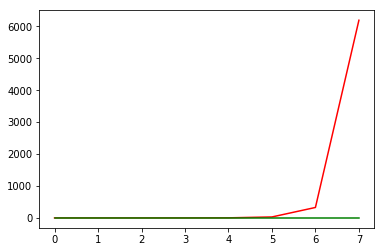

In [23]:
recTime = [
    0.00017595291137695312, 
     0.0030410289764404297,
     0.02917027473449707,
     0.25586676597595215,
     2.8153669834136963,
     30.04722309112549,
     327.3996090888977,
     6190.868427038193
]

dpTime = [
     5.7220458984375e-06, 
     9.059906005859375e-06,
     1.8835067749023438e-05,
     1.1920928955078125e-05,
     1.3113021850585938e-05,
     1.3828277587890625e-05,
     1.621246337890625e-05,
     3.600120544433594e-05
]

plt.plot(recTime, color="red")
plt.plot(dpTime, color="green")
plt.show()